In [2]:
%matplotlib inline
from pylab import *
from numpy import *
import neuron
import pyNN
from pyNN import neuron
from pyNN.standardmodels import electrodes, build_translations, StandardCurrentSource
from pyNN.parameters import ParameterSpace, Sequence
from pyNN.neuron import simulator
from pyNN.utility import get_simulator, normalized_filename
from pyNN.utility.plotting import Figure, Panel
from neuron import h
from quantities import mV,Hz, s ,ms
import elephant.kernels as kernels
import seaborn as sns

In [3]:
#amps = linspace(-10, 10, 10)
thresh = linspace(-70, -50, 10)
cell = neuron.Population(10, neuron.IF_curr_exp(v_thresh = -50, tau_refrac = 5.0, tau_m = 10.0))
for cell_id in arange(0,10,1):
    print(cell_id)
    cell[cell_id:(cell_id+1)].set(v_thresh= thresh[cell_id])
    pulse = neuron.ACSource(start = 20.0, stop = 80.0, amplitude = -10, offset = 0.1, frequency = 10, phase = 180.0)
    cell[cell_id].inject(pulse)
#for cell_id in arange(0,500):
#pulse = neuron.ACSource(start = 20.0, stop = 80.0, amplitude = amps[cell_id], offset = 0.1, frequency = 10, phase = 180.0)
    cell[cell_id].inject(pulse)
cell.record('v')
neuron.run(100.0)

0
1
2
3
4
5
6
7
8
9


100.00000000001417

In [4]:
cell.get('v_thresh')

array([-70.        , -67.77777778, -65.55555556, -63.33333333,
       -61.11111111, -58.88888889, -56.66666667, -54.44444444,
       -52.22222222, -50.        ])

In [5]:
vm = cell.get_data().segments[0].filter(name = "v")[0]

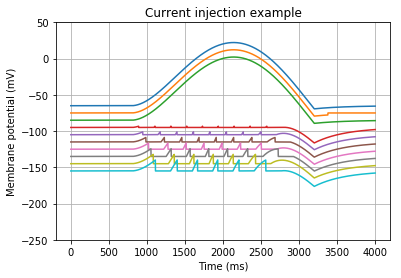

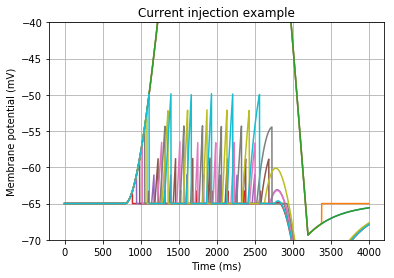

In [6]:
plt.figure()
for cell_id in arange(0,10):
    plt.plot(vm[:,cell_id]-10*mV*cell_id)
plt.grid()
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.ylim(-250, 50)
plt.title("Current injection example");
plt.figure()
for cell_id in arange(0,10):
    plt.plot(vm[:, cell_id])
plt.grid()
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.ylim(-70, -40)
plt.title("Current injection example");

In [7]:
cvm = vm[:,[8,9]]
print(cvm.T)
savetxt('vm.txt', vm)
savetxt('cellrun.sav', cvm)
savetxt('cellrun.txt', cvm)

[[-65.         -65.         -65.         ... -67.68194581 -67.67525767
  -67.6685862 ]
 [-65.         -65.         -65.         ... -67.90358129 -67.89634044
  -67.88911765]] mV


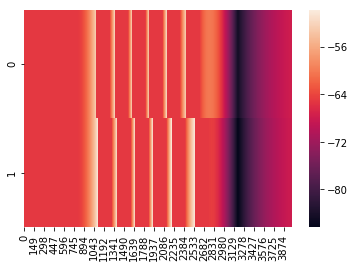

In [8]:
#vmc = corrcoef(vm.T)
#print(vmc)
sns.heatmap(cvm.T)

In [9]:
import elephant as ep

In [10]:
from elephant.spike_train_generation import threshold_detection

In [23]:
trains = {}
for cell_id in arange(7,9):
    trains[cell_id] = threshold_detection(vm[:,cell_id], threshold=-56.00*mV, sign='above')

In [24]:
for train in trains.values():
    if (len(train) > 0):
        print(train)

[25.775 32.725 39.    45.15  51.35  57.85  66.3  ] ms
[25.775 33.4   39.975 46.375 52.85  59.875] ms


In [25]:
from elephant.spike_train_dissimilarity import victor_purpura_dist

[[0.    1.512]
 [1.512 0.   ]]


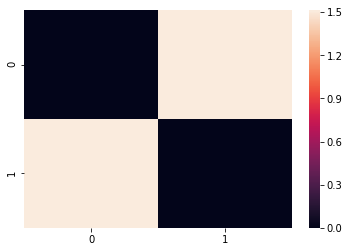

In [26]:
distance_matrix1 = victor_purpura_dist(trains.values(), q=array(80.0) * Hz)
print(distance_matrix1)
sns.heatmap(distance_matrix1)

In [28]:
trains[8].dimensionality.simplified

Dimensionality({second: 1})

In [31]:
import neo
import quantities as pq

In [32]:
isinstance(trains[8], (pq.quantity.Quantity, neo.core.SpikeTrain))

True

In [35]:
type(trains[8])

neo.core.spiketrain.SpikeTrain

In [41]:
from elephant.spike_train_dissimilarity import van_rossum_dist

[[0.         1.33029981]
 [1.33029981 0.        ]]


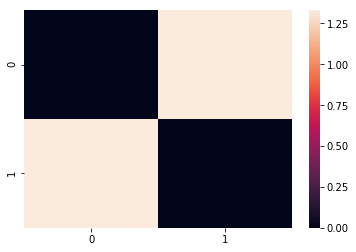

In [42]:
distance_matrix2 = van_rossum_dist(trains.values(), tau=array(10.0) * pq.ms, sort = True)
sns.heatmap(distance_matrix2)
print(distance_matrix2)